# TODO
1. PairPlots
2. Profiling reports
3. Compare results to preprocessed of UCI

In [75]:
generate_profiling_reports = False

In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
# set pandas to show all columns of the df when using the display function
pd.set_option('display.max_columns', None)

In [77]:
# list the datasets that should be used in the current run
datasets = ["hungarian", "cleveland", "switzerland", "long-beach-va"]

In [78]:
# custom function to read the dataset into a csv formated string
# the name is used as a delimiter here because it is the last feature and common among all entrys
def readRawData(filePath:str):
    with open(filePath) as file:
        dataString = file.read()
        dataString = dataString.replace("\n"," ")
        dataString = re.sub("[a-zA-Z]+ ","name\n", dataString)
        dataString = dataString.replace(" ",",")
        return dataString

In [79]:
# read the data from the specified datasets into the df
from io import StringIO
df = pd.DataFrame()
for dataset in datasets:
    dataset_df = pd.read_csv(StringIO(readRawData("./Data/"+ dataset +".data")), header=None, sep=",")
    dataset_df['dataset'] = dataset
    df = pd.concat([df,dataset_df ], ignore_index=True)

In [80]:
df.columns=["id", "ccf", "age", "sex", "painloc", "painexer" , "relrest" , "pncaden" , "cp", "trestbps", "htn", "chol", "smoke", "cigs", "years", "fbs", "dm", "famhist", "restecg", "ekgmo", "ekgday", "ekgyr", "dig", "prop", "nitr", "pro", "diuretic", "proto", "thaldur", "thaltime", "met", "thalach", "thalrest", "tpeakbps", "tpeakbpd", "dummy", "trestbpd", "exang", "xhypo", "oldpeak", "slope", "rldv5", "rldv5e", "ca", "restckm", "exerckm", "restef", "restwm", "exeref", "exerwm", "thal", "thalsev", "thalpul", "earlobe", "cmo", "cday", "cyr", "num", "lmt", "ladprox", "laddist", "diag", "cxmain", "ramus", "om1", "om2", "rcaprox", "rcadist", "lvx1", "lvx2", "lvx3", "lvx4", "lvf", "cathef", "junk", "name", "dataset"]

In [81]:
# read the data from the specified datasets into the df
from io import StringIO
dfNew = pd.DataFrame()
for dataset in datasets:
    dataset_df = pd.read_csv(StringIO(readRawData("./Data/"+ 'new' +".data")), header=None, sep=",")
    dataset_df['dataset'] = dataset
    dfNew = pd.concat([dfNew,dataset_df ], ignore_index=True)

In [82]:
df = df.replace(-9, float('nan'))

In [83]:
if generate_profiling_reports:
    import pandas_profiling
    profile = pandas_profiling.ProfileReport(df, title='Pandas Profiling Report for the complete UCI dataset', explorative=True)
    profile.to_file("Pandas Profiling Report for all features.html")

# General statistics

In [60]:
df.groupby('dataset').describe()

id                                                    \
               count         mean         std     min      25%     50%   
dataset                                                                  
cleveland      282.0   151.517730   87.131234     1.0    75.25   151.5   
hungarian      294.0  1195.853741  397.340367  1001.0  1080.25  1158.5   
long-beach-va  200.0   101.310000   58.717824     1.0    50.75   100.5   
switzerland    123.0  3625.886179  499.271374  3001.0  3031.50  4012.0   

                                  ccf                                     \
                   75%     max  count mean  std  min  25%  50%  75%  max   
dataset                                                                    
cleveland       227.75   298.0  282.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
hungarian      1235.75  5002.0  294.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
long-beach-va   152.25   202.0  200.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
switzerland    4042.50  4074.0  123.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

                 age                                                     \
               count       mean       std   min   25%   50%   75%   max   
dataset                                                                   
cleveland      282.0  54.411348  9.053083  29.0  48.0  55.0  61.0  77.0   
hungarian      294.0  47.826531  7.811812  28.0  42.0  49.0  54.0  66.0   
long-beach-va  200.0  59.350000  7.811697  35.0  55.0  60.0  64.0  77.0   
switzerland    123.0  55.317073  9.032108  32.0  51.0  56.0  61.5  74.0   

                 sex                                              painloc  \
               count      mean       std  min  25%  50%  75%  max   count   
dataset                                                                     
cleveland      282.0  0.677305  0.468338  0.0  0.0  1.0  1.0  1.0     0.0   
hungarian      294.0  0.724490  0.447533  0.0  0.0  1.0  1.0  1.0   294.0   
long-beach-va  200.0  0.970000  0.171015  0.0  1.0  1.0  1.0  1.0   200.0   
switzerland    123.0  0.918699  0.274414  0.0  1.0  1.0  1.0  1.0   123.0   

                                                           painexer            \
                   mean       std  min  25%  50%  75%  max    count      mean   
dataset                                                                         
cleveland           NaN       NaN  NaN  NaN  NaN  NaN  NaN      0.0       NaN   
hungarian      0.921769  0.268993  0.0  1.0  1.0  1.0  1.0    294.0  0.442177   
long-beach-va  0.925000  0.264052  0.0  1.0  1.0  1.0  1.0    200.0  0.675000   
switzerland    0.910569  0.286532  0.0  1.0  1.0  1.0  1.0    123.0  0.821138   

                                                 relrest                      \
                    std  min  25%  50%  75%  max   count      mean       std   
dataset                                                                        
cleveland           NaN  NaN  NaN  NaN  NaN  NaN     0.0       NaN       NaN   
hungarian      0.497492  0.0  0.0  0.0  1.0  1.0   294.0  0.520408  0.500435   
long-beach-va  0.469550  0.0  0.0  1.0  1.0  1.0   196.0  0.831633  0.375150   
switzerland    0.384804  0.0  1.0  1.0  1.0  1.0   123.0  0.780488  0.415609   

                                       pncaden                               \
               min  25%  50%  75%  max   count mean std min 25% 50% 75% max   
dataset                                                                       
cleveland      NaN  NaN  NaN  NaN  NaN     0.0  NaN NaN NaN NaN NaN NaN NaN   
hungarian      0.0  0.0  1.0  1.0  1.0     0.0  NaN NaN NaN NaN NaN NaN NaN   
long-beach-va  0.0  1.0  1.0  1.0  1.0     0.0  NaN NaN NaN NaN NaN NaN NaN   
switzerland    0.0  1.0  1.0  1.0  1.0     0.0  NaN NaN NaN NaN NaN NaN NaN   

                  cp                                              trestbps  \
               count      mean       std  min  25%  50%  75%  max    count   
dataset                                                      

# Through the high correlation check if dummy is equal to trestbps

In [87]:
print(df[df['dummy'] == df['trestbps']].shape)

(840, 77)


It is assumed that these two variables are representing the same value. Dummy is therefor removed.

In [88]:
irrelevant_columns = [
    "id", # A id is not relevant for a model
    "ccf", # the social security number does not influence if you have a heart disease or not
    "pncaden", # sum of painlox painexer relrest -> the features are already in the dataset -> drop because it is a duplicate
    "ekgmo", # The date of the medical examination is irrelevant for the occurrence of a disease.
    "ekgday", # The date of the medical examination is irrelevant for the occurrence of a disease.
    "ekgyr", # The date of the medical examination is irrelevant for the occurrence of a disease.
    "cmo", # The date of the medical examination is irrelevant for the occurrence of a disease.
    "cday", # The date of the medical examination is irrelevant for the occurrence of a disease.
    "cyr", # The date of the medical examination is irrelevant for the occurrence of a disease.
    "name", # Constant

]
df.drop(irrelevant_columns, inplace=True, axis=1)

In [89]:
unexplained_columns = [
    "restckm", # irrelevant according to the uci
    "exerckm", # irrelevant according to the uci
    "thalsev", # irrelevant according to the uci
    "thalpul", # irrelevant according to the uci
    "earlobe", # Constant
    "lvx1", # it is not possible to gain information about what this feature measures -> could not be supplied to trained models -> drop https://archive.ics.uci.edu/ml/datasets/Heart+Disease
    "lvx2", # it is not possible to gain information about what this feature measures -> could not be supplied to trained models -> drop https://archive.ics.uci.edu/ml/datasets/Heart+Disease
    "lvx3", # it is not possible to gain information about what this feature measures -> could not be supplied to trained models -> drop https://archive.ics.uci.edu/ml/datasets/Heart+Disease
    "lvx4", # it is not possible to gain information about what this feature measures -> could not be supplied to trained models -> drop https://archive.ics.uci.edu/ml/datasets/Heart+Disease
    "lvf", # it is not possible to gain information about what this feature measures -> could not be supplied to trained models -> drop https://archive.ics.uci.edu/ml/datasets/Heart+Disease
    'junk', # it is not possible to gain information about what this feature measures -> could not be supplied to trained models -> drop https://archive.ics.uci.edu/ml/datasets/Heart+Disease
    "dummy" # same as trestbps
]
df.drop(unexplained_columns, inplace=True, axis=1)

In [90]:
hidden_identifier = [
    'lmt',      # Left main truck
    'ladprox',  # Proximal left anterior descending artery
    'laddist',  # Distal left anterior descending artery
    'diag',     # Diagonal branches
    'cxmain',   # Circumflex
    'ramus',    # Ramus intermedius
    'om1',      # First obtuse marginal branch
    'om2',      # Second obtuse marginal branch
    'rcaprox',  # Proximal right coronary artery
    'rcadist',  # Distal right coronary artery
]
df.drop(hidden_identifier, inplace=True, axis=1)

In [91]:
if generate_profiling_reports:
    profile = pandas_profiling.ProfileReport(df, title='Pandas Profiling Report for the used features from the UCI dataset', explorative=True)
    profile.to_file("Pandas Profiling Report for all used features.html")

# Start of analysis
## Static Analysis
### Get the number of entries where the ST Depression was measured at a timepoint that is higher than the Exercise electrocardiogram

In [92]:
df[df['thaltime'] > df['thaldur']].shape

(25, 45)

### Analyse thalach and thalrest

In [93]:
df.loc[df['thalach'] < df['thalrest'],['thalach','thalrest']]

,thalach,thalrest
673,60.0,63.0


The resting heart rate (thalrest) can not be lower than the maximum archived heart rate (thalach) because the thalach seems unrealisitc it is set to NaN

## see effects of enriching smoke

In [94]:
#enrich smoke
class DataframeSmokeTransformer:
    def transform(self, input_df, **transform_params):
        # we do not enrich smoke if cigs and years are conflicting

        # set all values of smoke that are NaN to 0 if the value of years is 0 and smoke does not indicate that the person smokes
        input_df.loc[(input_df['smoke'].isna()) & (input_df['years'] == 0) & ~(input_df['cigs'] > 0),'smoke'] = 0
        # set all values of smoke that are NaN to 1 if the value of years is larger than 0 and smoke does not indicate that the person does not smoke
        input_df.loc[(input_df['smoke'].isna()) & (input_df['years'] > 0) & (input_df['cigs'] != 0),'smoke'] = 1

        # set all values of smoke that are NaN to 0 if the value of smoke is 0 and years does not indicate that the person smokes
        input_df.loc[(input_df['smoke'].isna()) & (input_df['cigs'] == 0) & ~(input_df['years'] > 0),'smoke'] = 0
        # set all values of smoke that are NaN to 1 if the value of cigs is larger than 0 and years does not indicate that the person does not smoke
        input_df.loc[(input_df['smoke'].isna()) & (input_df['cigs'] > 0) & (input_df['years'] != 0),'smoke'] = 1
        return input_df
percentage_missing_pre = ((df["smoke"].isna().sum() / len(df) * 100).round(2))

dfst = DataframeSmokeTransformer()
df = dfst.transform(df)

percentage_missing_post = ((df["smoke"].isna().sum() / len(df) * 100).round(2))
print(f"missing before enrichment:\t {percentage_missing_pre}%")
print(f"missing after enrichment:\t {percentage_missing_post}%")

missing before enrichment:	 74.42%
missing after enrichment:	 43.05%


## Explore how many NaNs and zeros are within one column for each attribute.

In [95]:
(df.loc[:, df.columns != 'dataset'].eq(0)).join(df['dataset']).groupby("dataset").sum()

,age,sex,painloc,painexer,relrest,cp,trestbps,htn,chol,smoke,cigs,years,fbs,dm,famhist,restecg,dig,prop,nitr,pro,diuretic,proto,thaldur,thaltime,met,thalach,thalrest,tpeakbps,tpeakbpd,trestbpd,exang,xhypo,oldpeak,slope,rldv5,rldv5e,ca,restef,restwm,exeref,exerwm,thal,num,cathef
dataset,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
cleveland,0,91,0,0,0,0,0,108,0,115,115,115,240,0,107,138,271,186,211,252,248,0,0,43,0,0,0,0,0,0,190,276,91,0,0,0,166,0,0,0,0,0,157,0
hungarian,0,81,23,164,141,0,0,195,0,10,0,0,266,0,1,235,293,274,265,269,290,0,0,0,0,0,0,0,0,0,204,291,189,0,0,0,3,0,3,0,2,0,188,0
long-beach-va,0,6,15,65,33,0,1,90,49,96,38,38,125,4,100,80,122,88,61,105,94,0,0,2,0,0,0,0,0,1,52,139,40,1,0,0,2,0,10,0,2,0,51,0
switzerland,0,10,11,22,27,0,0,60,123,5,0,0,43,0,0,85,116,70,75,66,93,0,0,25,0,0,0,0,0,0,68,113,42,0,0,0,0,0,0,0,0,0,8,0


In [96]:
(df.loc[:, df.columns != 'dataset'].eq(-9)).join(df['dataset']).groupby("dataset").sum()

,age,sex,painloc,painexer,relrest,cp,trestbps,htn,chol,smoke,cigs,years,fbs,dm,famhist,restecg,dig,prop,nitr,pro,diuretic,proto,thaldur,thaltime,met,thalach,thalrest,tpeakbps,tpeakbpd,trestbpd,exang,xhypo,oldpeak,slope,rldv5,rldv5e,ca,restef,restwm,exeref,exerwm,thal,num,cathef
dataset,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
cleveland,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
hungarian,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
long-beach-va,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
switzerland,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## outliers

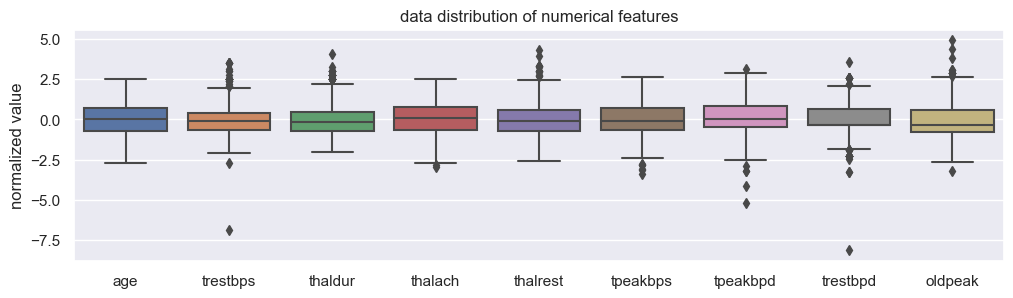

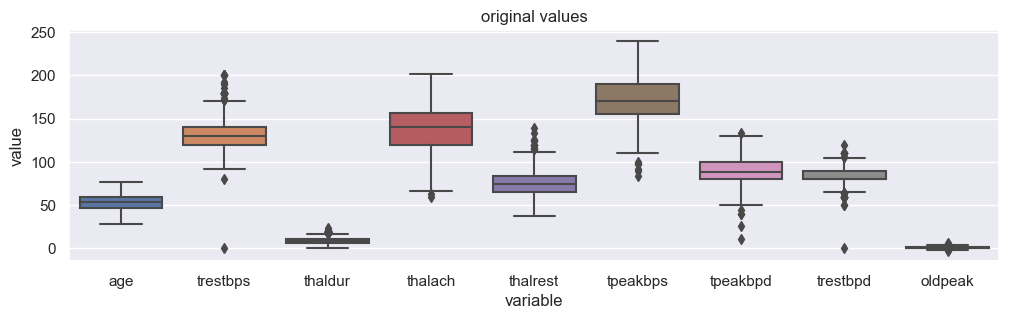

In [97]:
from sklearn.preprocessing import StandardScaler, MaxAbsScaler

df_continous = df[["age","trestbps","thaldur","thalach","thalrest","tpeakbps","tpeakbpd","trestbpd","oldpeak"]]

sc = StandardScaler()
temp = sc.fit_transform(df_continous)
df_continous = pd.DataFrame(temp, columns = ["age","trestbps","thaldur","thalach","thalrest","tpeakbps","tpeakbpd","trestbpd","oldpeak"])
ax = sns.boxplot(x="variable", y="value", data=pd.melt(df_continous))
ax.set(xlabel='', ylabel='normalized value')
plt.title("data distribution of numerical features")
plt.show()

df_continous = df[["age","trestbps","thaldur","thalach","thalrest","tpeakbps","tpeakbpd","trestbpd","oldpeak"]]

sns.boxplot(x="variable", y="value", data=pd.melt(df_continous))
plt.title("original values")
sns.set(rc={"figure.figsize":(12, 3)})
plt.show()




## Correlation

In [98]:
percentage_missing = ((df.isna().sum()/len(df)*100).round(2)).to_dict()
test = {}
for percentage in np.arange(0,100,1):
    missing_vlaues = {key: val for key, val in percentage_missing.items() if val > percentage}
    test[percentage] = df.drop([*missing_vlaues.keys()], axis=1).shape + (df.drop([*missing_vlaues.keys()], axis=1).isna().sum().sum(), )

C:\Users\fhuel\AppData\Local\Temp\ipykernel_2492\2009535367.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


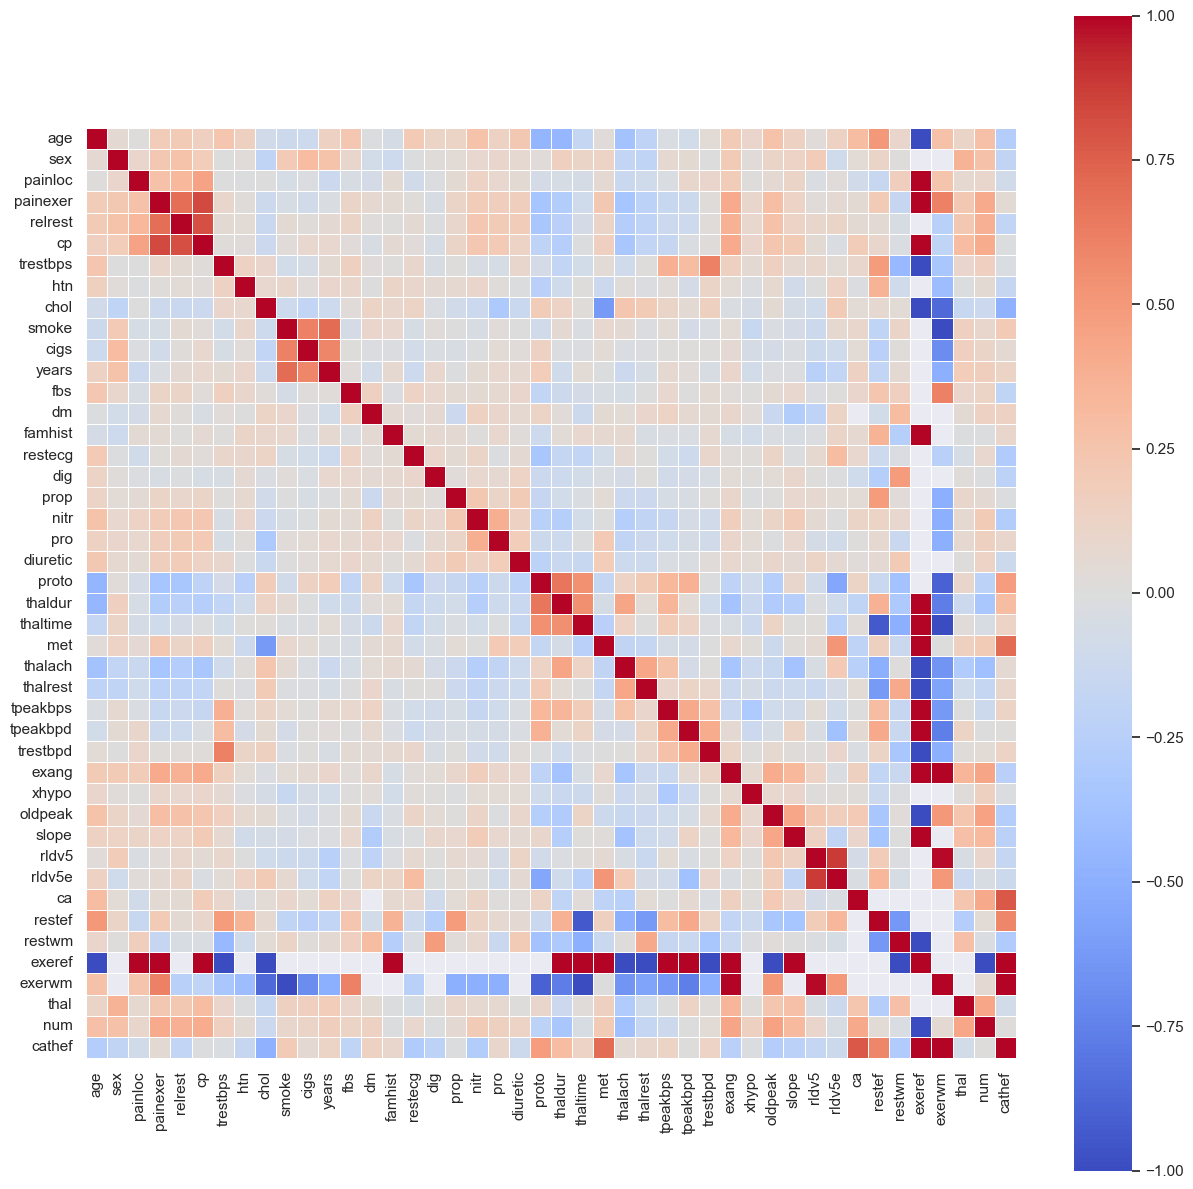

In [99]:
plt.figure(figsize=(15,15))
# Compute the correlation matrix
corr = df.corr()
corr = corr.round(2)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap="coolwarm", center=0, square=True, linewidths=.5, vmin=-1, vmax=1)
plt.show()

C:\Users\fhuel\AppData\Local\Temp\ipykernel_2492\1127674732.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df[df['dataset'] == dataset].corr()


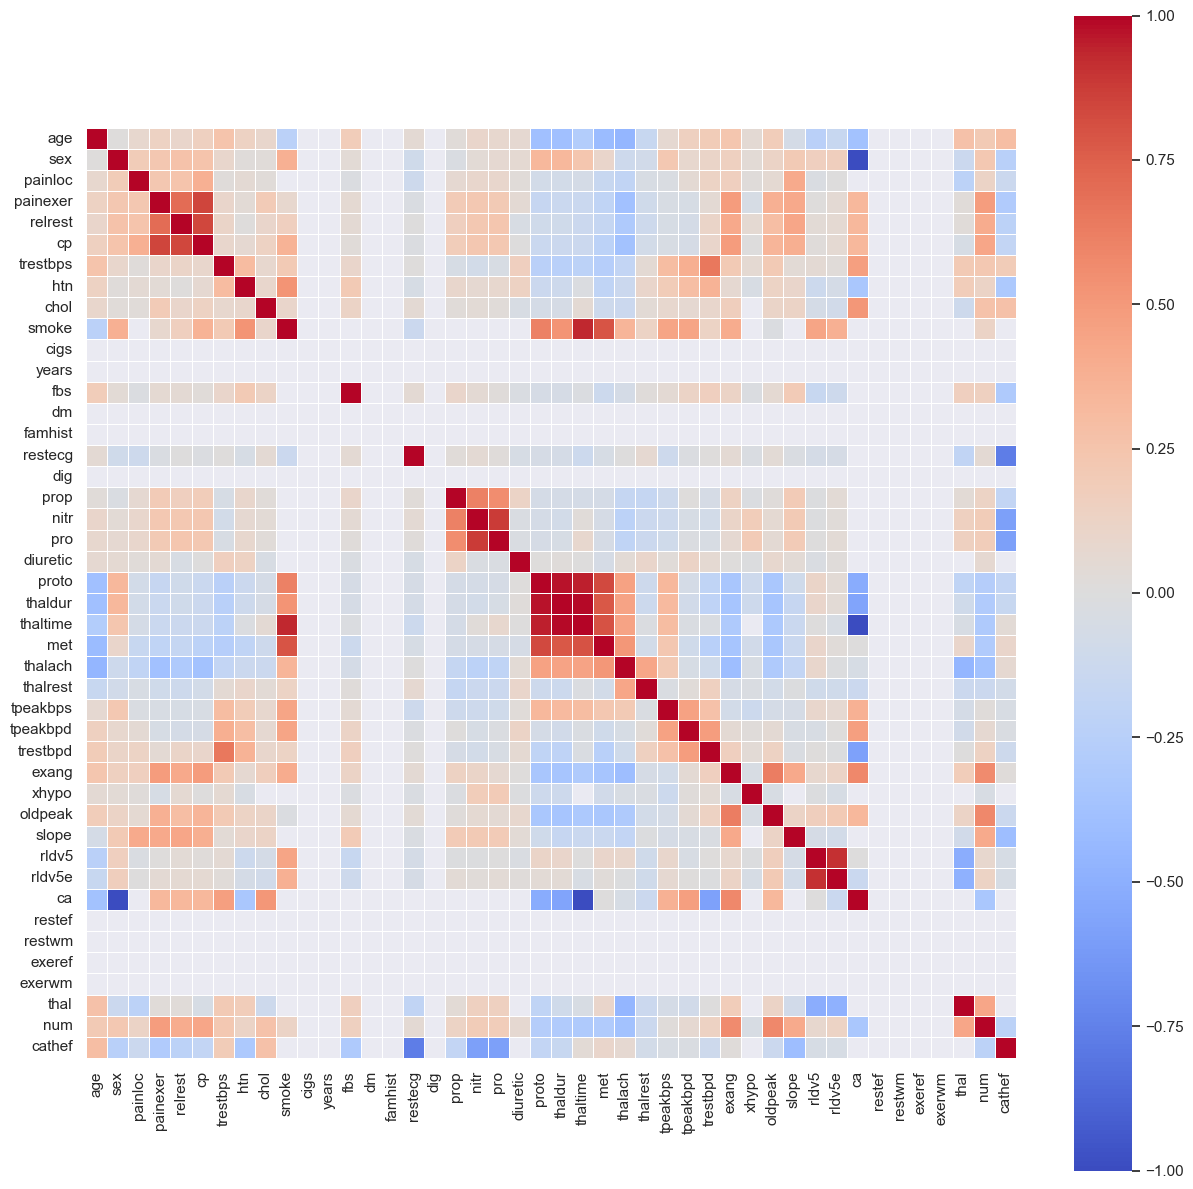

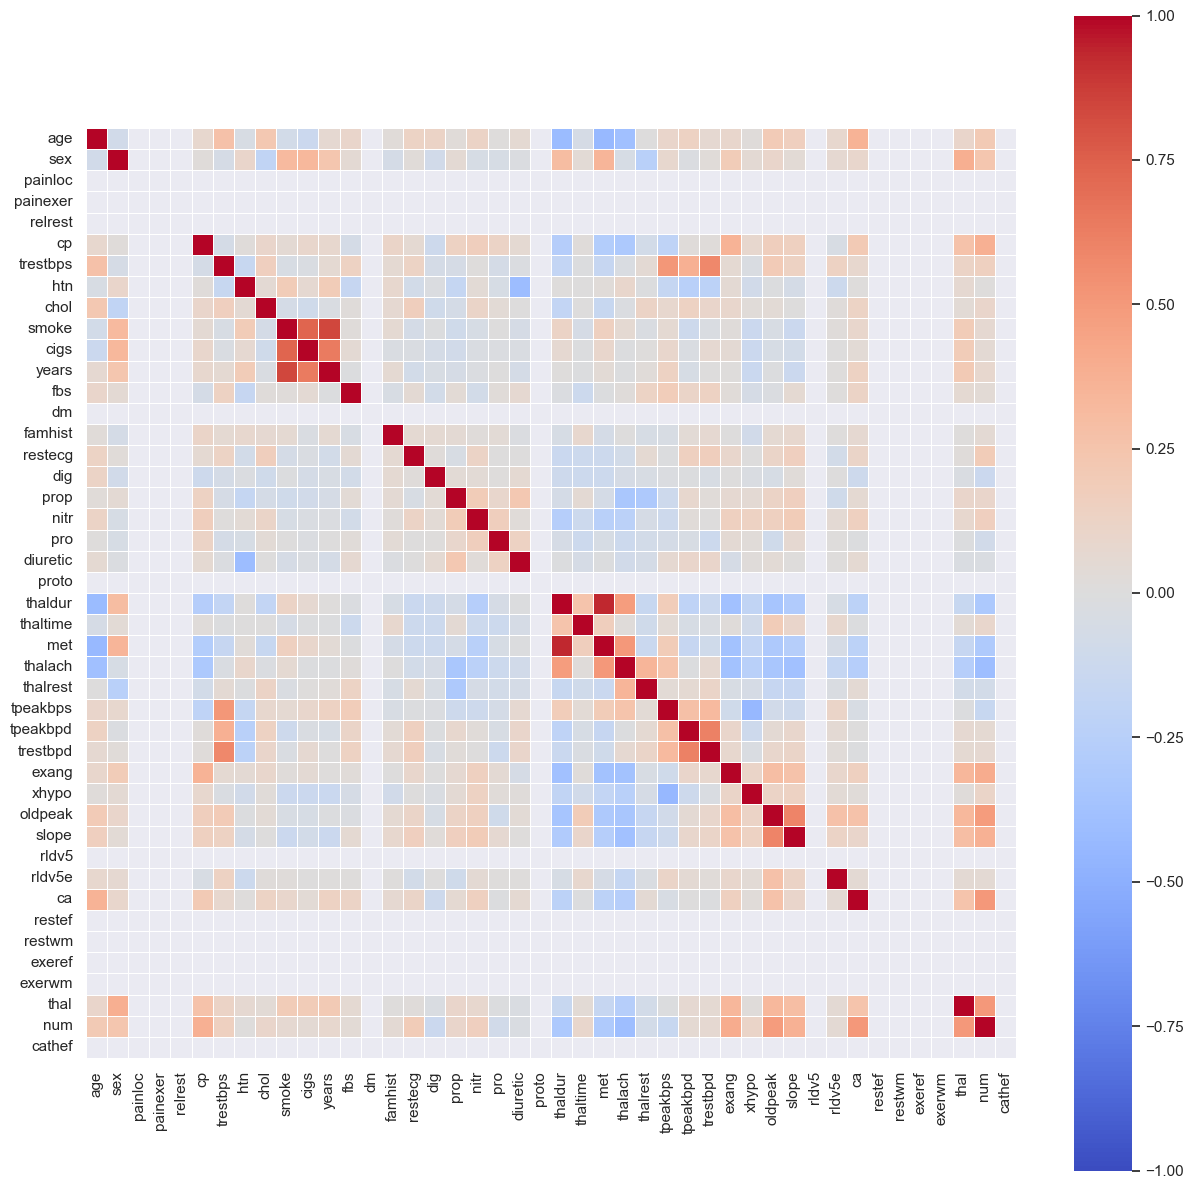

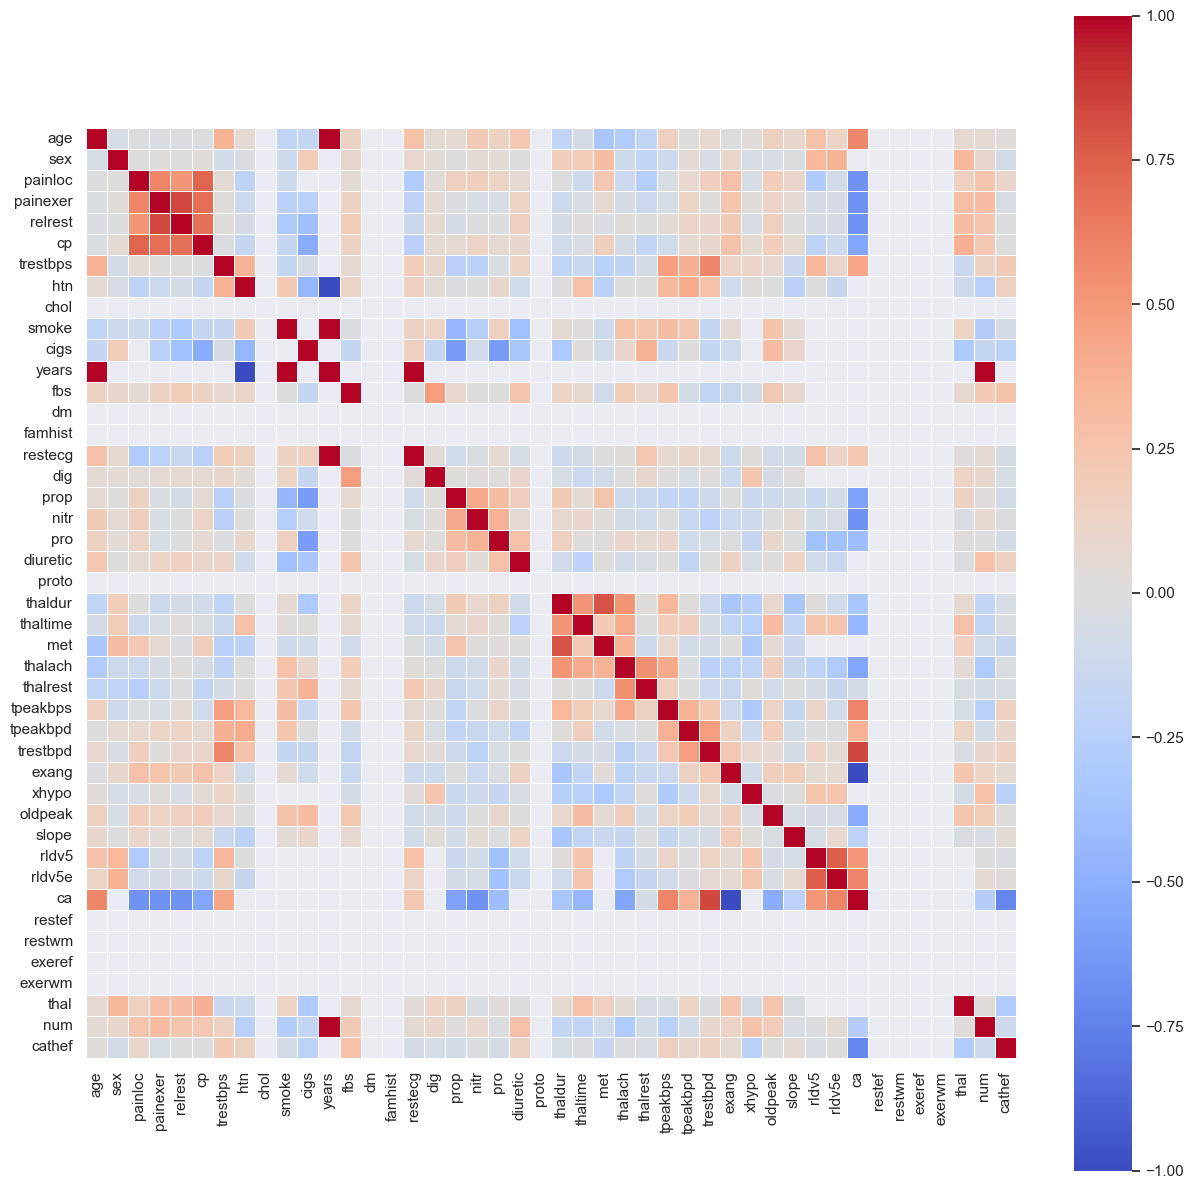

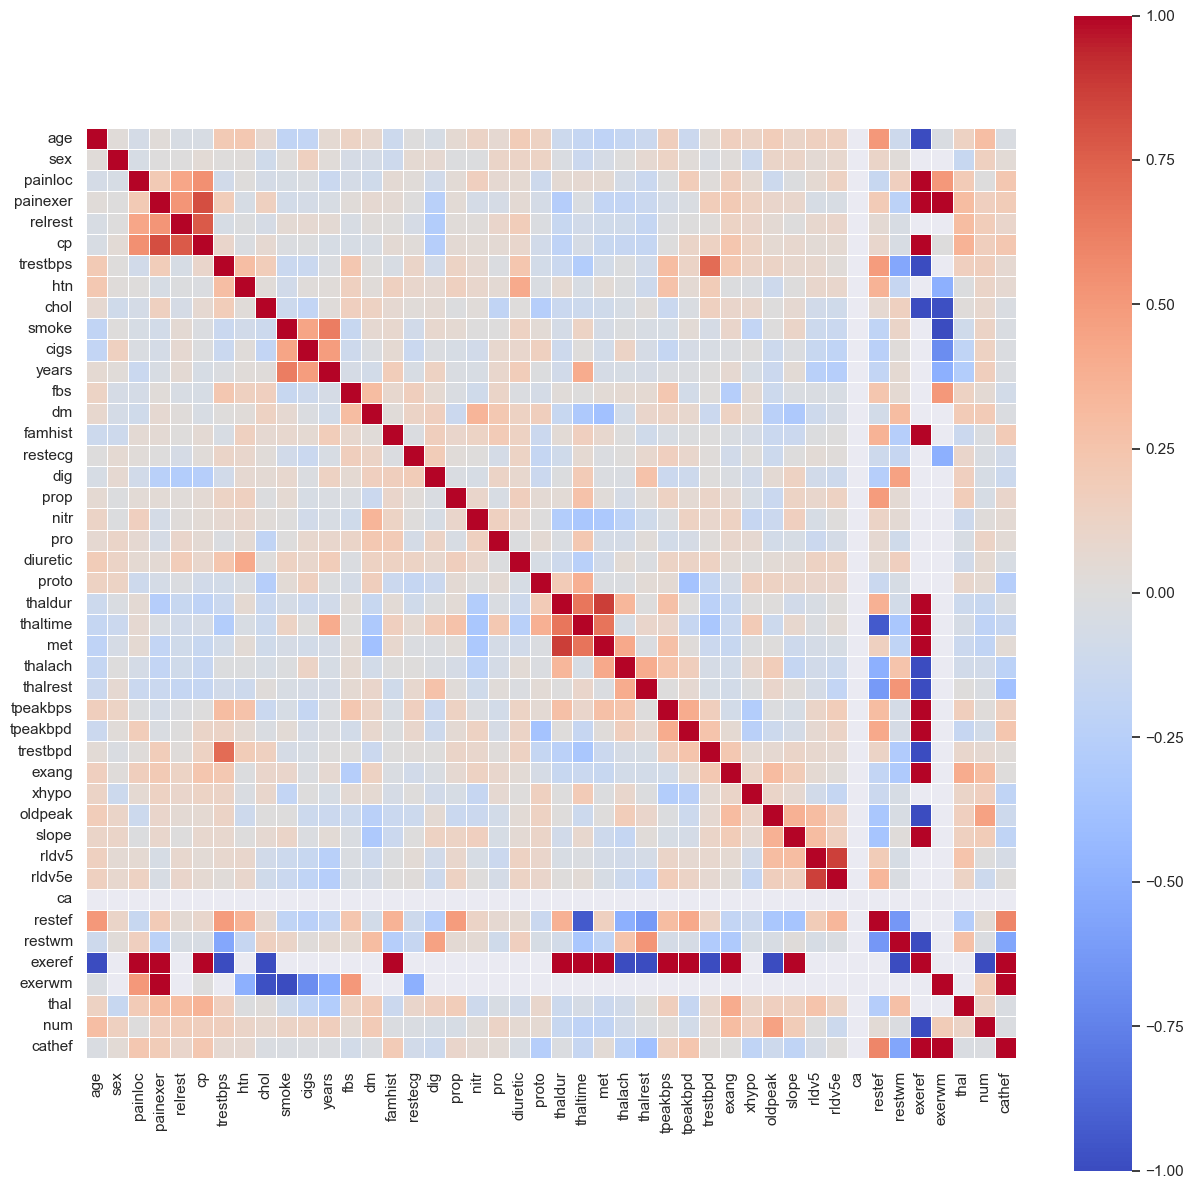

In [100]:
for dataset in datasets:
    plt.figure(figsize=(15, 15))
    # Compute the correlation matrix
    corr = df[df['dataset'] == dataset].corr()
    corr = corr.round(2)
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, cmap="coolwarm", center=0, square=True, linewidths=.5, vmin=-1, vmax=1)
    plt.show()


In [101]:
df_corr = df.copy()
df_corr = pd.concat([df_corr,pd.get_dummies(df_corr['cp'], prefix='cp')],axis=1)
df_corr.drop(['cp'],axis=1, inplace=True)

percentage_missing = ((df_corr.isna().sum()/len(df_corr)*100).round(2)).to_dict()

In [102]:
unstacked_corr = df_corr.corr().unstack()
#remove duplicate pairs
#index = pd.MultiIndex.from_tuples(tuples)
unstacked_corr = unstacked_corr.reset_index()
unstacked_corr.columns = ["feature1","feature2","correlation"]
#remove duplicates and correlation between the same feature
unstacked_corr = unstacked_corr[unstacked_corr['feature1'] < unstacked_corr['feature2']]
unstacked_corr['NaN_Values_feature1'] = [percentage_missing[x] for x in unstacked_corr['feature1']]
unstacked_corr['NaN_Values_feature2'] = [percentage_missing[x] for x in unstacked_corr['feature2']]
unstacked_corr['abs_corr'] = abs(unstacked_corr['correlation'])
unstacked_corr = unstacked_corr[(abs(unstacked_corr["correlation"]) > 0.5) & (unstacked_corr['NaN_Values_feature1'] < 75) & (unstacked_corr['NaN_Values_feature2'] < 75)].sort_values(by="abs_corr", ascending=False)
unstacked_corr.drop(["abs_corr"], inplace=True, axis=1)
print(unstacked_corr)

      feature1  feature2  correlation  NaN_Values_feature1  \
2165      cp_4  painexer     0.927771                 0.00   
1585     rldv5    rldv5e     0.884520                47.27   
1687        ca    cathef     0.784472                67.63   
2166      cp_4   relrest     0.719787                 0.00   
2072      cp_2   relrest    -0.712302                 0.00   
386      smoke     years     0.704192                43.05   
1997    cathef       met     0.696134                65.41   
145   painexer   relrest     0.694375                31.37   
961      proto   thaldur     0.663422                12.46   
2023      cp_1   painloc    -0.638315                 0.00   
352       chol       met    -0.619028                 3.34   
1321  trestbpd  trestbps     0.614386                 6.56   
431       cigs     smoke     0.610471                46.72   
433       cigs     years     0.589092                46.72   
2161      cp_3      cp_4    -0.582680                 0.00   
1009   t

C:\Users\fhuel\AppData\Local\Temp\ipykernel_2492\3186757647.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  unstacked_corr = df_corr.corr().unstack()


In [103]:
cp_4VSpainexer = pd.crosstab(df_corr['cp_4'], df_corr['painexer'], rownames=['cp_4'], colnames=['painexer'])
cpVSpainexer = pd.crosstab(df['cp'], df['painexer'], rownames=['cp_4'], colnames=['painexer'])
print(cp_4VSpainexer)
print("------------------------------------")
print(cpVSpainexer)

painexer  0.0  1.0
cp_4              
0         247   18
1           4  348
------------------------------------
painexer  0.0  1.0
cp_4              
1          22    1
2         117    7
3         108   10
4           4  348


## PairPlots

# minimumPercentageToBeDropped

In [104]:
print_pair_plots = False #was missing
if print_pair_plots:
    sns.pairplot(df, hue="num", palette="tab10")
if print_pair_plots:
    sns.pairplot(df, hue="dataset", palette="tab10")

In [105]:
test = pd.DataFrame.from_dict(test).transpose()
test.columns = ["rows", "columns", "number of imputed cells"]

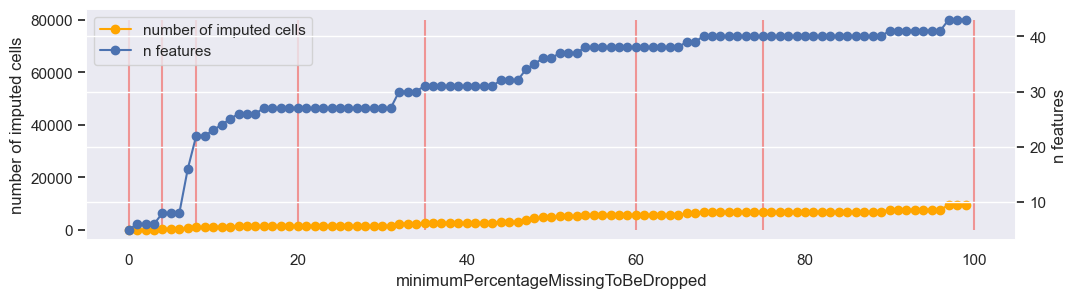

In [171]:
fig, ax = plt.subplots(1)
thresholds = [0,4,8,20,35,60,75,100]
ax.grid()
for threshold in thresholds:
    ax.vlines(threshold,0,80000,color="#ef9494")
lns1 = ax.plot(test.index, test["number of imputed cells"], '-o', label = 'number of imputed cells', color = 'orange')
#add decided thresholds

ax2 = ax.twinx()
lns2 = ax2.plot(test.index, test["columns"], '-o', label = 'n features')
ax.legend(loc=0)

ax.set_xlabel('minimumPercentageMissingToBeDropped')
ax.set_ylabel('number of imputed cells')
ax2.set_ylabel('n features')

# added these three lines
lns = lns1 + lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=2, bbox_to_anchor=(0,1))
plt.show()

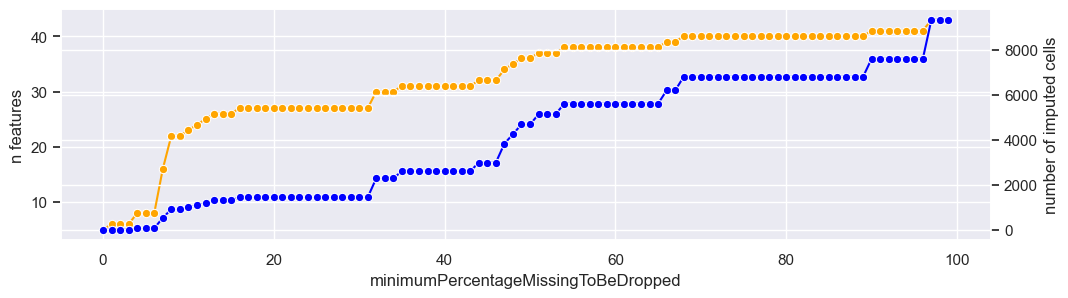

In [133]:
from matplotlib.lines import Line2D


ax1 = sns.lineplot(data=test, y="columns", x=test.index, color="orange", marker='o')
ax2 = sns.lineplot(data=test, y="number of imputed cells", x=test.index, ax=ax1.twinx(), color="blue", marker='o')
ax1.set_ylabel('n features')
ax1.set_xlabel('minimumPercentageMissingToBeDropped')
ax2.set_ylabel('number of imputed cells')
plt.show()


In [30]:
percentage_missing = ((df.isna().sum() / len(df) * 100).round(2)).to_dict()
test = {}
for percentage in np.arange(0, 100, 10):
    missing_vlaues = {key: val for key, val in percentage_missing.items() if val > percentage}
    test[percentage] = df.drop([*missing_vlaues.keys()], axis=1).dropna(axis=0, how='any').shape
test = pd.DataFrame.from_dict(test).transpose()
test.columns = ["rows", "columns"]

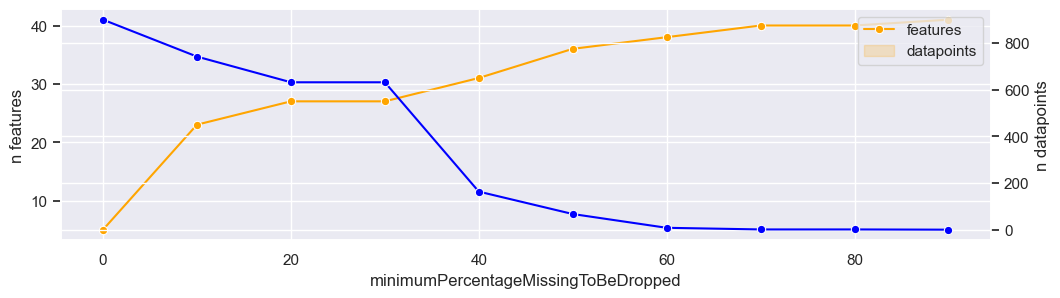

In [31]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1 = sns.lineplot(data=test, y="columns", x=test.index, ax=ax1, color="orange", marker='o')
ax2 = sns.lineplot(data=test, y="rows", x=test.index, ax=ax2, color="blue", marker='o')
ax1.set_ylabel('n features')
ax1.set_xlabel('minimumPercentageMissingToBeDropped')
ax2.set_ylabel('n datapoints')
ax1.figure.legend(['features','datapoints'], bbox_to_anchor=(1.,1),loc=1, bbox_transform=ax1.transAxes)
plt.show()

# Model visualisation

In [32]:
class DataframeSmokeTransformer:
    def transform(self, input_df, **transform_params):
        # we do not enrich smoke if cigs and years are conflicting

        # set all values of smoke that are NaN to 0 if the value of years is 0 and smoke does not indicate that the person smokes
        input_df.loc[(input_df['smoke'].isna()) & (input_df['years'] == 0) & ~(input_df['cigs'] > 0),'smoke'] = 0
        # set all values of smoke that are NaN to 1 if the value of years is larger than 0 and smoke does not indicate that the person does not smoke
        input_df.loc[(input_df['smoke'].isna()) & (input_df['years'] > 0) & (input_df['cigs'] != 0),'smoke'] = 1

        # set all values of smoke that are NaN to 0 if the value of smoke is 0 and years does not indicate that the person smokes
        input_df.loc[(input_df['smoke'].isna()) & (input_df['cigs'] == 0) & ~(input_df['years'] > 0),'smoke'] = 0
        # set all values of smoke that are NaN to 1 if the value of cigs is larger than 0 and years does not indicate that the person does not smoke
        input_df.loc[(input_df['smoke'].isna()) & (input_df['cigs'] > 0) & (input_df['years'] != 0),'smoke'] = 1
        return input_df
    def fit(self, X, y=None, **fit_params):
        # there is nothing to be fitted here because this handling is not split specific
        return self

In [33]:
class EnrichHeartData:
    def transform(self, input_df, **transform_params):
        input_df["heart_rate_diff"] = input_df['thalach'] - input_df['thalrest']
        input_df["rldv5_diff"] = input_df['rldv5'] - input_df['rldv5e']
        return input_df

    def fit(self, X, y=None, **fit_params):
        return self

In [34]:
from sklearn.exceptions import NotFittedError


class DropColumnsBasedOnMinimumPercentageToBeDropped:
    def __init__(self):
        self.minimum_percentage_to_be_dropped = 100
        self.fitted = False
        self.valuesToKeep = []

    def set_params(self, **params):
        self.minimum_percentage_to_be_dropped = params.get('minimum_percentage_to_be_dropped')

    def transform(self, input_df, **transform_params):
        if self.fitted:
            return input_df[input_df.columns.intersection(self.valuesToKeep)]
        else:
            raise NotFittedError()

    def fit(self, X, y=None, **fit_params):
        # calculate percentage of missing values for each column and store in a dictionary
        percentage_missing = (X.isna().sum()/len(df)*100).to_dict()
        # generate list of columns to keep
        self.valuesToKeep = [key for key, val in percentage_missing.items() if val <= self.minimum_percentage_to_be_dropped]
        self.fitted = True
        return self

In [35]:
class FixCommonEncodingErrors:
    def transform(self, input_df, **transform_params):
        input_df = input_df.copy(deep=True)
        # if cholesterin is 0 it was not measured
        input_df.loc[input_df['chol'] == 0,'chol'] =  np.float64("NaN")
        # leave the dead ones behind
        # drop entries with a blood pressure of 0
        input_df.loc[input_df['trestbps'] == 0,'trestbps'] =  np.float64("NaN")
        # is a binary variable (wrong measurement was detected in Pandas Profiling Report)
        input_df.loc[df['prop'].isin([0,1]) == False,'prop' ] = np.float64("NaN")
        # is a variable that has the values 0-3 by definition  (wrong measurement was detected in Pandas Profiling Report)
        input_df.loc[input_df['ca'] >3 ,'ca'] =  np.float64("NaN")
        # transform proto according to possible values from data/ask-detrano
        input_df.loc[input_df['proto'] == 200,'proto'] =  9
        input_df.loc[input_df['proto'] == 175,'proto'] =  8
        input_df.loc[input_df['proto'] == 150,'proto'] =  7
        input_df.loc[input_df['proto'] == 130,'proto'] =  6
        input_df.loc[input_df['proto'] == 125,'proto'] =  5
        input_df.loc[input_df['proto'] == 100,'proto'] = 4
        input_df.loc[input_df['proto'] == 75,'proto'] = 3
        input_df.loc[input_df['proto'] == 50,'proto'] = 2
        input_df.loc[input_df['proto'] == 25,'proto'] = 1
        #set all other values to NaN
        input_df.loc[input_df['proto'].isin([*range(1,13)]) == False, 'proto'] = np.float64("NaN")
        # the timepoint when the measurement was taken can not be larger than the time that the exercise took.
        input_df.loc[df['thaltime'] > df['thaldur'], 'thaltime'] = np.float64('NaN')
        # maximum archived heart rate can not  be lower than the heart rate at rest
        input_df.loc[input_df['thalach'] < input_df['thalrest'],'thalach'] = np.float64('NaN')

        return input_df
    def fit(self, X, y=None, **fit_params):
        return self

In [36]:
df.loc[df["num"]>1,'num'] = 1

In [37]:
from sklearn.preprocessing import KBinsDiscretizer, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.impute import SimpleImputer
from imblearn.pipeline import Pipeline
one_hot_encoded_features = ['cp','restecg', 'slope','ca', 'restwm']
X = df.loc[:,(df.columns!= 'num') & (df.columns != 'dataset') ].copy(deep=True)
y = df.loc[: , (df.columns== 'num')].values.ravel().copy()
oneHotEncoder = ColumnTransformer(
    transformers=[
        ('discretize', KBinsDiscretizer(strategy='ordinal'), ['age']),
        ('oneHotEncoder', OneHotEncoder(handle_unknown='ignore'), lambda X : [value for value in one_hot_encoded_features if value in X.columns]),
    ], remainder='passthrough')
pipeline = Pipeline(steps=[
    ('fix_encoding_errors', FixCommonEncodingErrors()),
    ('transform_smoke', DataframeSmokeTransformer()),
    ('enrich_heart_rate', EnrichHeartData()),
    ('drop_columns', DropColumnsBasedOnMinimumPercentageToBeDropped()),
    ('oneHotEncoder', oneHotEncoder),
    ('impute', SimpleImputer()),
    ('scaler', 'passthrough'),
    ('sampler', 'passthrough'),
    ('estimator', DecisionTreeClassifier())
])
parameters = {
    'drop_columns__minimum_percentage_to_be_dropped' : 0,
    'estimator__criterion': "gini",
    'estimator__max_depth': None,
    'estimator__min_samples_split': 2,
    'impute__strategy':'mean',
    'oneHotEncoder__discretize': KBinsDiscretizer(2,encode='ordinal', strategy='uniform')
}
pipeline.set_params(**parameters)
pipeline.fit(X,y)

Pipeline(steps=[('fix_encoding_errors',
                 <__main__.FixCommonEncodingErrors object at 0x000002505B36B1C0>),
                ('transform_smoke',
                 <__main__.DataframeSmokeTransformer object at 0x000002505D0BB5E0>),
                ('enrich_heart_rate',
                 <__main__.EnrichHeartData object at 0x000002505D0B90F0>),
                ('drop_columns',
                 <__main__.DropColumnsBasedOnMinimumPercentageToBeDropped object at 0x000002505...
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('discretize',
                                                  KBinsDiscretizer(encode='ordinal',
                                                                   n_bins=2,
                                                                   strategy='uniform'),
                                                  ['age']),
                                                 ('oneHotEncoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <function <lambda> at 0x000002505CF57D90>)])),
                ('impute', SimpleImputer()), ('scaler', 'passthrough'),
                ('sampler', 'passthrough'),
                ('estimator', DecisionTreeClassifier())])

In [38]:
decision_tree = pipeline['estimator']

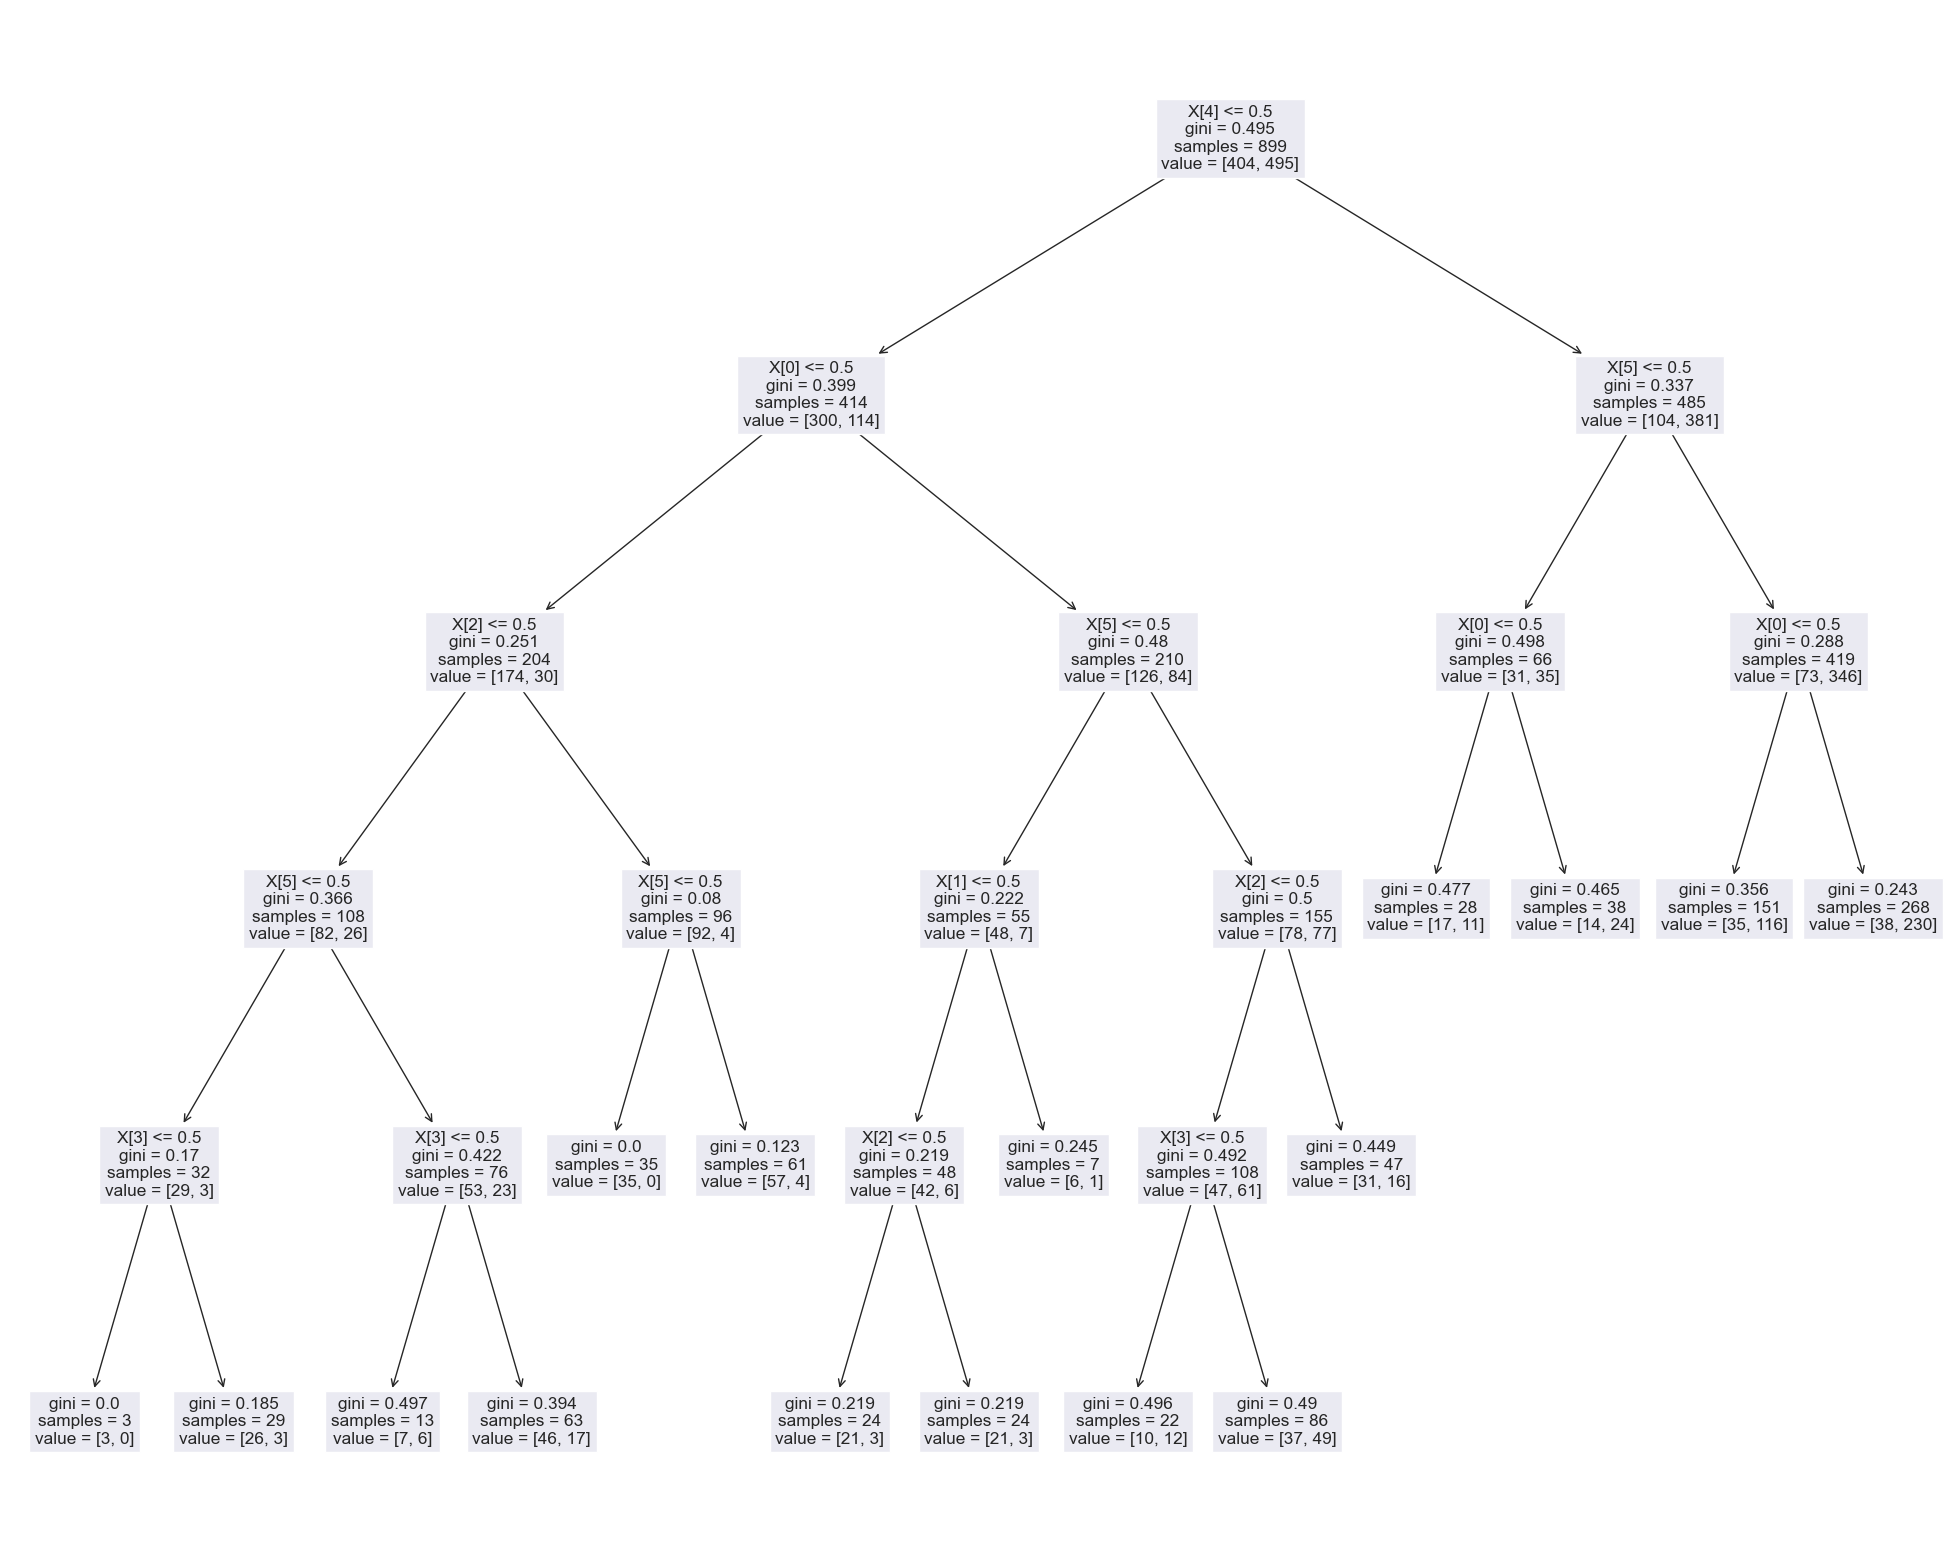

In [39]:
from sklearn import tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(decision_tree)


In [49]:
X = df.loc[:,(df.columns!= 'num') & (df.columns != 'dataset') ].copy(deep=True)
y = df.loc[: , (df.columns== 'num')].values.ravel().copy()
X_transformed = X.copy(deep=True)
X_transformed = FixCommonEncodingErrors().transform(X_transformed)
X_transformed = DataframeSmokeTransformer().transform(X_transformed)
X_transformed = EnrichHeartData().transform(X_transformed)
columnDropper = DropColumnsBasedOnMinimumPercentageToBeDropped()
columnDropper.set_params(**{'minimum_percentage_to_be_dropped':0})
columnDropper.fit(X)
X_transformed = columnDropper.transform(X_transformed)
# discretizer =  KBinsDiscretizer(2,encode='ordinal', strategy='uniform')
# X_transformed['age'] = discretizer.fit_transform(X_transformed['age'].to_numpy().reshape(-1, 1))
# oneHotEncoder = OneHotEncoder(handle_unknown='ignore')
# one_hot_encoded_features = [value for value in one_hot_encoded_features if value in X_transformed.columns]
# encoded = pd.DataFrame(oneHotEncoder.fit_transform(X_transformed[one_hot_encoded_features]).toarray(), columns=oneHotEncoder.get_feature_names(one_hot_encoded_features))
# X_transformed = X_transformed.drop(columns=one_hot_encoded_features)
# X_transformed = X_transformed.join(encoded)
# imputer = SimpleImputer(strategy='mean')
# X_transformed = pd.DataFrame(imputer.fit_transform(X_transformed), columns=imputer.get_feature_names_out())
# scaler = MaxAbsScaler()
# X_transformed = pd.DataFrame(scaler.fit_transform(X_transformed), columns=scaler.get_feature_names_out())
# sampler = RandomUnderSampler(random_state=42)
# X_transformed, y = sampler.fit_resample(X_transformed,y)
decisionTreeClassifier = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=2)
decisionTreeClassifier = decisionTreeClassifier.fit(X_transformed,y)

c:\Users\fhuel\miniconda3\envs\dataMining\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


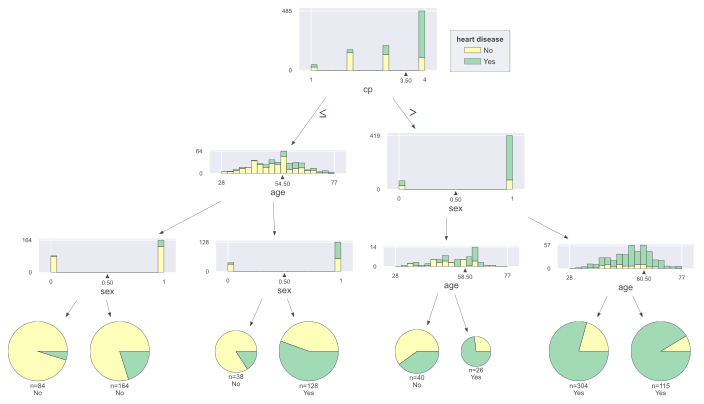

In [50]:
from dtreeviz.trees import dtreeviz # remember to load the package

viz = dtreeviz(decisionTreeClassifier, X_transformed, y,
               target_name="heart disease",
               feature_names=X_transformed.columns,
               class_names=['No','Yes']
               )
viz

c:\Users\fhuel\miniconda3\envs\dataMining\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


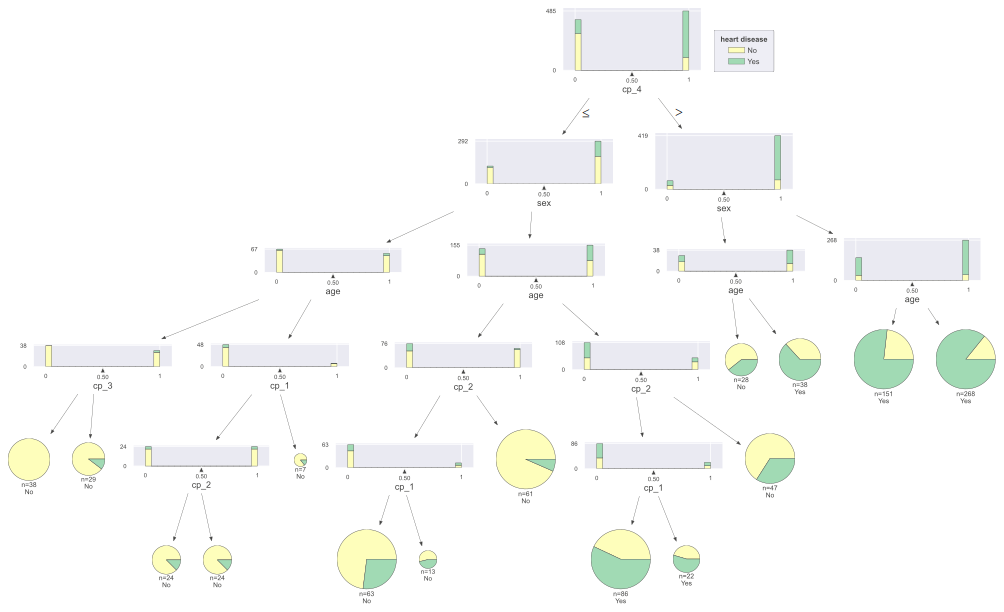

In [42]:
from dtreeviz.trees import dtreeviz # remember to load the package

viz = dtreeviz(decisionTreeClassifier, X_transformed, y,
               target_name="heart disease",
               feature_names=X_transformed.columns,
               class_names=['No','Yes']
               )

viz
